# Multilayer perceptron impl from scratch for regression problem with logloss error and sigmoid activation fuction

In [1]:
import numpy as np
from random import random
from sklearn.metrics import log_loss

class MLP(object):
    
    def __init__(self, n_inputs = 3, n_hidden = [3,3], n_output = 2):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_output = n_output
        
        layers = [self.n_inputs] + self.n_hidden + [self.n_output]
        
        # init random weights
        weights  = []
        
        for i in range(len(layers)-1):
            w = np.random.rand(layers[i], layers[i+1])
            weights.append(w)
            
        self.weights  = weights
       
    
        # init storage for activations
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
            
        self.activations = activations
        
        
        # init storage for activations
        derivatives = []
        for i in range(len(layers)-1):
            d = np.zeros((layers[i], layers[i+1]) )
            derivatives.append(d)
            
        self.derivatives = derivatives
           
            
            
    def forward_propagate(self, inputs):
        
        activations = inputs
        self.activations[0] = inputs
        
        
        for i, w in enumerate(self.weights):
            
            net_inputs = np.dot(activations, w)
            
            activations = self._sigmoid(net_inputs)
            self.activations[i+1] = activations
            
        return activations
    
    def back_propagate(self, error, verbose = False):
        
        for i in reversed(range(len(self.derivatives))):
            activations = self.activations[i+1]
            delta = error * self._sigmoid_derivative(activations)
            # reshape delta for canculations
            delta_reshaped = delta.reshape(delta.shape[0], -1).T
            
            current_activations = self.activations[i]
            # reshape current_activations for canculations 
            current_activations_reshaped = current_activations.reshape(current_activations.shape[0], -1)
            
            
            self.derivatives[i] = np.dot(current_activations_reshaped, delta_reshaped)
            
            error = np.dot(delta, self.weights[i].T)
            if verbose:
                print('Derivatives for W{}: {}'.format(i, self.derivatives[i]))
        return error
    
    def gradient_descent(self, learning_rate):
        
        for i in range(len(self.weights)):
            weight = self.weights[i]
#             print('Original W{} {}'.format(i, weight))
            
            derivatives = self.derivatives[i]
            
            weight += derivatives*learning_rate
#             print('After learning W{} {}'.format(i, weight))
    
    
    def train(self, inputs, targets, epochs, learning_rate, verbose = False):
        
        for i in range(epochs):
            sum_error = 0
            for input_, target in zip(inputs, targets):
                # perform forward propagation
                output = self.forward_propagate(input_)

                # calculate error
                error = target - output

                # back propagation
                self.back_propagate(error)

                # apply gradient descent
                self.gradient_descent(learning_rate = learning_rate)
                
                sum_error +=self.loss(target, output)
                
            # report erro for each epoch
            if verbose:
                print('Error: {} at epoch {} '.format(sum_error/len(inputs), i))
        
    
    
    
    
    def loss(self, target, output):
        
        return  np.mean(-target*np.log(output)-(1-target)*np.log(output))
        
        
        
        
    
    def _sigmoid_derivative(self, x):
        return x*(1.0 - x)
        
             
        
    def _sigmoid(self, x):
        y = 1.0 / (1 + np.exp(-x))
        return y

# Get data for reggression problem from sklearn.datasets

In [2]:
from sklearn.datasets import make_classification

n_samples = 1000
n_outliers = 100

X, y= make_classification(n_samples=n_samples,n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state =42)

# Visualize data

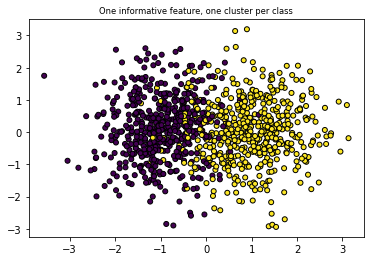

In [3]:
import matplotlib.pyplot as plt
plt.title("One informative feature, one cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# Split data to train and test 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_train.shape

(670,)

In [5]:
mlp = MLP(2, [8,2], 1) # one hidden layer with 3 neurons
mlp.train(X_train, y_train, 100, 0.5, verbose = False)


In [6]:
output = mlp.forward_propagate(X_test)
mlp.loss(output = output, target = y_test)

1.7182750734708927

In [7]:
output =output.round()


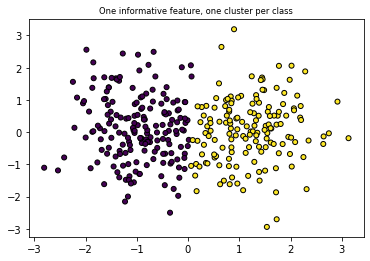

In [8]:
plt.title("One informative feature, one cluster per class", fontsize='small')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=output,
            s=25, edgecolor='k')

# Classification solution with keras Sequential model with the same properties

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from tensorflow.keras.optimizers import SGD

In [10]:
input_shape = (2,)

print(f'Feature shape: {input_shape}')
# Create the model
model = Sequential()
model.add(Dense(8, input_shape=input_shape, activation='sigmoid'))
model.add(Dense(82, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Configure the model and start training
opt = SGD(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['binary_crossentropy'])
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0, validation_split=0.2)

Feature shape: (2,)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
model.evaluate(X_test, y_test)

330/330 [==============================] - 0s 22us/sample - loss: 0.2280 - binary_crossentropy: 0.2280


[0.2279762513935566, 0.22797625]

In [12]:
y_pred = model.predict(X_test).round()

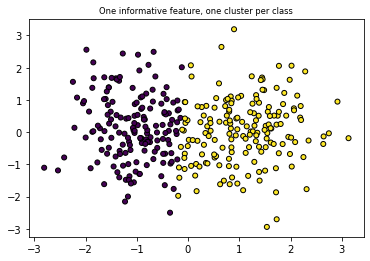

In [13]:
plt.title("One informative feature, one cluster per class", fontsize='small')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred,
            s=25, edgecolor='k')

# Custom MLP wokrs well for classification. for better results can be choosed better hyperparams
Keras Sequential model with the same properties works better because of way of implementation